#### Data set cleaning

Dataset: 

- _Megaline.zip_
    - _megaline_calls.csv_
    - _megaline_internet.csv_
    - _megaline messages.csv_
    - _megaline_plans.csv_
    - _megaline_users.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-14

# Data Cleaning – Mobile Service Dataset

## __1. Libraries__

In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "raw" / "Megaline.zip"
df_calls = load_dataset_from_zip(data_file_path, "megaline_calls.csv", sep='|', header='infer', decimal=',', keep_default_na=False)
df_internet = load_dataset_from_zip(data_file_path, "megaline_internet.csv", sep=';', header='infer', decimal=',', keep_default_na=False)
df_messages = load_dataset_from_zip(data_file_path, "megaline_messages.csv", sep='/', header='infer', keep_default_na=False)
df_plans = load_dataset_from_zip(data_file_path, "megaline_plans.csv", sep=';', header='infer', keep_default_na=False)
df_users = load_dataset_from_zip(data_file_path, "megaline_users.csv", sep='|', header='infer', keep_default_na=False)

##### `LSPL`

**Note:** `keep_default_na=False` is used to later convert missing values to `pd.NA`.  
This is beneficial because `pd.NA` provides:

- Consistency across data types  
- Type integrity preservation  
- Cleaner logical operations  
- Improved control over missing data

Since high performance or heavy computation is not required here, using `pd.NA` is appropriate.

In [3]:
# Format notebook output
format_notebook()

## __3. Data set cleaning__

In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          137735 non-null  object 
 1      USER Id  137735 non-null  int64  
 2   Call DATE   137735 non-null  object 
 3    Duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0      Id           104825 non-null  object 
 1      User ID      104825 non-null  int64  
 2    session Date   104825 non-null  object 
 3    MB USED        104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   iD               76051 non-null  object
 1      useR ID       76051 non-null  int64 
 2    Message DATE    76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Messages Included         2 non-null      int64  
 1   MB Per month Included     2 non-null      int64  
 2    Minutes Included         2 non-null      int64  
 3      UsD monthly PAY        2 non-null      int64  
 4    usd per GB               2 non-null      int64  
 5       usd PER  message      2 non-null      float64
 6    usd per Minute           2 non-null      float64
 7     Plan Name               2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    User Id       500 non-null    int64 
 1   First name     500 non-null    object
 2    Last name     500 non-null    object
 3   Age            500 non-null    int64 
 4   City           500 non-null    object
 5      reg date    500 non-null    object
 6      plan        500 non-null    object
 7    Churn Date    500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### 3.1. Standardizing String values using "snake case"

#### 3.1.1 Standardizing Column Labels

In [9]:
# Standardize column labels with snake_case format
df_calls = normalize_columns_headers_format(df_calls)
df_calls.columns = ['call_id'] + list(df_calls.columns[1:])
df_calls.columns

Index(['call_id', 'user_id', 'call_date', 'duration'], dtype='object')

In [10]:
df_internet = normalize_columns_headers_format(df_internet)
df_internet.columns = ['session_id'] + list(df_internet.columns[1:])
df_internet.columns

Index(['session_id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [11]:
df_messages = normalize_columns_headers_format(df_messages)
df_messages.columns = ['message_id'] + list(df_messages.columns[1:])
df_messages.columns

Index(['message_id', 'user_id', 'message_date'], dtype='object')

In [12]:
df_plans = normalize_columns_headers_format(df_plans)
df_plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [13]:
df_users = normalize_columns_headers_format(df_users)
df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date'], dtype='object')

#### 3.1.2 Standardizing Dataframe String values

In [14]:
# Standardize data frame string values with snake_case format
df_plans = normalize_string_format(df_plans, include=['plan_name'])
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
df_users = normalize_string_format(df_users, include=['first_name', 'last_name', 'city', 'plan'])
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta_sandy_springs_roswell,_ga_msa",2018-12-24,ultimate,
1,1001,mickey,wilkerson,28,"seattle_tacoma_bellevue,_wa_msa",2018-08-13,surf,
2,1002,carlee,hoffman,36,"las_vegas_henderson_paradise,_nv_msa",2018-10-21,surf,
3,1003,reynaldo,jenkins,52,"tulsa,_ok_msa",2018-01-28,surf,
4,1004,leonila,thompson,40,"seattle_tacoma_bellevue,_wa_msa",2018-05-23,surf,
...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-09-04,surf,
496,1496,ariel,shepherd,49,"new_orleans_metairie,_la_msa",2018-02-20,surf,
497,1497,donte,barrera,49,"los_angeles_long_beach_anaheim,_ca_msa",2018-12-10,ultimate,
498,1498,scot,williamson,51,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-02-04,surf,


##### `LSPL`

**Note:** 

The column names and string values did not follow a consistent format; they contained spaces and capital letters, making them difficult to manipulate.

__Solution__: Column names and string values were standardized using lowercase letters, removing spaces, and applying the snake_case format.   
__Impact__: This facilitated data access and manipulation, improving readability and reducing errors in analysis.

### 3.2 Explicit duplicates

In [16]:
# Show explicit duplicates amount
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_calls'</i>: <b>{df_calls.duplicated().sum()}</b>"))

In [17]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_internet'</i>: <b>{df_internet.duplicated().sum()}</b>"))

In [18]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_messages'</i>: <b>{df_messages.duplicated().sum()}</b>"))

In [19]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_plans'</i>: <b>{df_plans.duplicated().sum()}</b>"))

In [20]:
# Delete explicit duplicated rows
# Not required

##### `LSPL`

**Note:** 

No explicit duplicate rows were detected.

### 3.3 Missing values

#### 3.3.1 Missing values check

In [21]:
# Show missing values
check_existing_missing_values(df_calls)

In [22]:
check_existing_missing_values(df_internet)

In [23]:
check_existing_missing_values(df_messages)

In [24]:
check_existing_missing_values(df_plans)

In [25]:
check_existing_missing_values(df_users)

#### 3.3.2 Replacing missing values (pd.NA)

In [26]:
# Replace missing values with pd.NA
df_users = replace_missing_values(df_users, include=['churn_date'])
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta_sandy_springs_roswell,_ga_msa",2018-12-24,ultimate,<NA>
1,1001,mickey,wilkerson,28,"seattle_tacoma_bellevue,_wa_msa",2018-08-13,surf,<NA>
2,1002,carlee,hoffman,36,"las_vegas_henderson_paradise,_nv_msa",2018-10-21,surf,<NA>
3,1003,reynaldo,jenkins,52,"tulsa,_ok_msa",2018-01-28,surf,<NA>
4,1004,leonila,thompson,40,"seattle_tacoma_bellevue,_wa_msa",2018-05-23,surf,<NA>
...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-09-04,surf,<NA>
496,1496,ariel,shepherd,49,"new_orleans_metairie,_la_msa",2018-02-20,surf,<NA>
497,1497,donte,barrera,49,"los_angeles_long_beach_anaheim,_ca_msa",2018-12-10,ultimate,<NA>
498,1498,scot,williamson,51,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-02-04,surf,<NA>


#### 3.3.3 Preview missing values

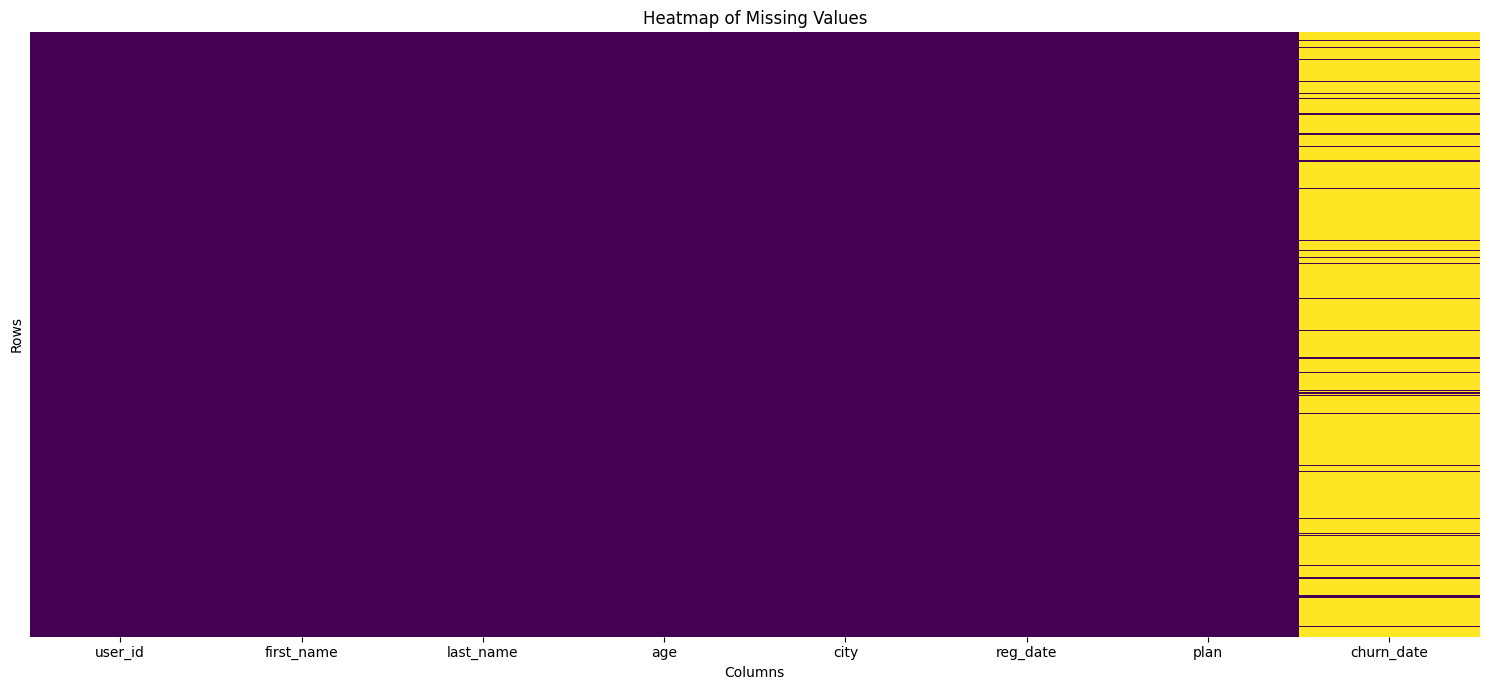

In [27]:
# Show missing values heatmap
missing_values_heatmap(df_users)

In [28]:
# Show pd.NA missing values for 'shurn_date' column
mask = df_users['churn_date'].isna()
df_users.loc[mask, :]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta_sandy_springs_roswell,_ga_msa",2018-12-24,ultimate,<NA>
1,1001,mickey,wilkerson,28,"seattle_tacoma_bellevue,_wa_msa",2018-08-13,surf,<NA>
2,1002,carlee,hoffman,36,"las_vegas_henderson_paradise,_nv_msa",2018-10-21,surf,<NA>
3,1003,reynaldo,jenkins,52,"tulsa,_ok_msa",2018-01-28,surf,<NA>
4,1004,leonila,thompson,40,"seattle_tacoma_bellevue,_wa_msa",2018-05-23,surf,<NA>
...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-09-04,surf,<NA>
496,1496,ariel,shepherd,49,"new_orleans_metairie,_la_msa",2018-02-20,surf,<NA>
497,1497,donte,barrera,49,"los_angeles_long_beach_anaheim,_ca_msa",2018-12-10,ultimate,<NA>
498,1498,scot,williamson,51,"new_york_newark_jersey_city,_ny_nj_pa_msa",2018-02-04,surf,<NA>


#### 3.3.4  Missing values data imputation

In [29]:
# Handle df_orders pd.NA missing values within 'churn_date' column
# According to the dictionary, churn_date = the date the user stopped using the service (if the value is missing, 
# the plan was in use when this database was retrieved)

##### `LSPL`

**Note:** 

1. Missing values in __df_users__, _churn_dater_ column

Missing values in the `churn_date` column occur exclusively on rows where the plan was in use, indicating that the plan is still active and being used by the user.

__Solution__: All missing values in `churn_date` will be left as pd.NA. This preserves the column identifying correctly the active users against the non-active users represented by a date (the date the user stopped using the service). No imputation will be done.

__Impact__: Identifying users with pd.NA, will help differentitate correctly the inactive users.



### 3.4 Implicit duplicates

#### 3.4.1 Implicit duplicates check

In [30]:
# Show implicit duplicates df_aisles
# Not required

#### 3.4.2 Implicit duplicates data imputation

In [31]:
# Not required

### 3.5 Casting data types

#### 3.5.1 Casting to string data type

In [32]:
# df_users 'first_name' to string
df_users['first_name'] = df_users['first_name'].astype('string')
df_users['first_name'].dtypes

string[python]

In [33]:
# df_users 'last_name' to string
df_users['last_name'] = df_users['last_name'].astype('string')
df_users['last_name'].dtypes

string[python]

In [34]:
# df_users 'city to string
df_users['city'] = df_users['city'].astype('string')
df_users['city'].dtypes

string[python]

#### 3.5.2 Casting to numeric data type

In [ ]:
# No Need

#### 3.5.3 Casting to category data type

In [37]:
# df_plans 'plan_name' to category
df_plans['plan_name'] = df_plans['plan_name'].astype('category')
df_plans['plan_name'].dtypes


CategoricalDtype(categories=['surf', 'ultimate'], ordered=False, categories_dtype=object)

In [39]:
# df_users 'plan' to category
df_users['plan'] = df_users['plan'].astype('category')
df_users['plan'].dtypes

CategoricalDtype(categories=['surf', 'ultimate'], ordered=False, categories_dtype=object)

#### 3.5.4 Casting to boolean data type

In [ ]:
# No need


## __4. Final cleaning dataframe review__

In [40]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_id    137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [41]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   session_id    104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [42]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_id    76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [43]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 370.0 bytes


In [44]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     500 non-null    int64   
 1   first_name  500 non-null    string  
 2   last_name   500 non-null    string  
 3   age         500 non-null    int64   
 4   city        500 non-null    string  
 5   reg_date    500 non-null    object  
 6   plan        500 non-null    category
 7   churn_date  34 non-null     object  
dtypes: category(1), int64(2), object(2), string(3)
memory usage: 28.1+ KB


## __5. Generate a new clean Data set .csv file__

In [45]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "calls_clean.csv"
df_calls.to_csv(processed_path, index=False)

In [46]:
processed_path = project_root / "data" / "processed" / "internet_clean.csv"
df_internet.to_csv(processed_path, index=False)

In [47]:
processed_path = project_root / "data" / "processed" / "messages_clean.csv"
df_messages.to_csv(processed_path, index=False)

In [48]:
processed_path = project_root / "data" / "processed" / "plans_clean.csv"
df_plans.to_csv(processed_path, index=False)

In [49]:
processed_path = project_root / "data" / "processed" / "users_clean.csv"
df_users.to_csv(processed_path, index=False)